# Preprocessing

On this notebook, i will make the necessary preprocessing of the variables of interest in order to model the price based on other features.

## Packages loading and table loading

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [56]:
#table loading

list_df = pd.read_csv('../raw_data/mexico/clean_listing.csv')

list_df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4123,1,0,2021-12-19,1.45399,1,363,0
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,15000,1,50,2021-08-23,0.41000,10,344,1
2,56074,Great space in historical San Rafael,265650,Maris,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,600,2,66,2021-11-21,0.50000,2,364,10


## Scaling the data

### Looking at the data distribution
Now, to understand the distribution of our data, and eventually which selecting the adequate scaler, i will plot an histogram for every numerical column.

Text(0.5, 1.0, 'num_rev_ltm')

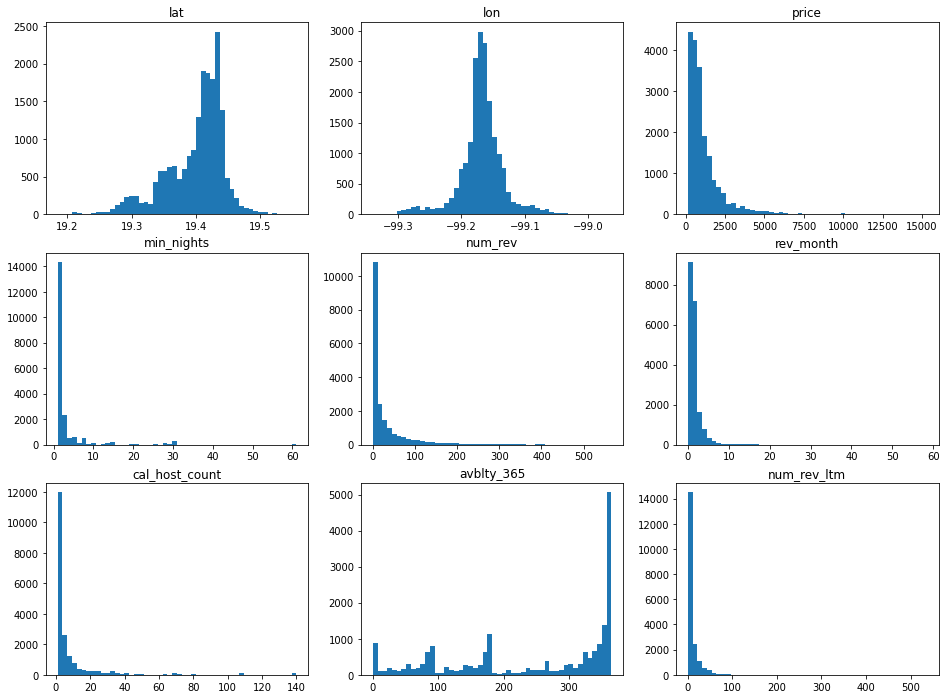

In [57]:
fig, axs = plt.subplots(3,3, figsize=(16,12))

axs[0,0].hist(list_df[['latitude']], bins=50)
axs[0,0].set_title('lat')
axs[0,1].hist(list_df[['longitude']], bins=50)
axs[0,1].set_title('lon')
axs[0,2].hist(list_df[['price']], bins=50)
axs[0,2].set_title('price')

axs[1,0].hist(list_df[['minimum_nights']], bins=50)
axs[1,0].set_title('min_nights')
axs[1,1].hist(list_df[['number_of_reviews']], bins=50)
axs[1,1].set_title('num_rev')
axs[1,2].hist(list_df[['reviews_per_month']], bins=50)
axs[1,2].set_title('rev_month')

axs[2,0].hist(list_df[['calculated_host_listings_count']], bins=50)
axs[2,0].set_title('cal_host_count')
axs[2,1].hist(list_df[['availability_365']], bins=50)
axs[2,1].set_title('avblty_365')
axs[2,2].hist(list_df[['number_of_reviews_ltm']], bins=50)
axs[2,2].set_title('num_rev_ltm')

We can see that latitude, longitude, price, number of reviews and reviews per month follow what's seems to be a normal distribution. Where variables such as min nights, availability and have a different pattern. 

This will help to determine whether a standard scalers or a min max scaler, robust scaler should be used.

First i will copy the dataframe so i can modify it confindently

In [159]:
#i select the variables that are less redundant and might be importat for predicting the price
proc_df = list_df.drop(columns=['id','host_id','host_name','name','last_review','number_of_reviews_ltm'])

In [160]:
proc_df.head(3)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4123,1,0,1.45399,1,363
1,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,15000,1,50,0.41000,10,344
2,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,600,2,66,0.50000,2,364


In [161]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
r_scaler = RobustScaler()

#For latitude, longitude and price i will use standardscaler

proc_df['latitude'] = std_scaler.fit_transform(proc_df[['latitude']])
proc_df['longitude'] = std_scaler.fit_transform(proc_df[['longitude']])
proc_df['price'] = std_scaler.fit_transform(proc_df[['price']])

#For minimum nights and number of reviews

proc_df['minimum_nights'] = mm_scaler.fit_transform(proc_df[['minimum_nights']])
proc_df['number_of_reviews'] = mm_scaler.fit_transform(proc_df[['number_of_reviews']])
proc_df['reviews_per_month'] = mm_scaler.fit_transform(proc_df[['reviews_per_month']])
proc_df['calculated_host_listings_count'] = mm_scaler.fit_transform(proc_df[['calculated_host_listings_count']])
proc_df['availability_365'] = mm_scaler.fit_transform(proc_df[['availability_365']])
#proc_df['number_of_reviews_ltm'] = mm_scaler.fit_transform(proc_df[['number_of_reviews_ltm']])





In [162]:
proc_df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Cuajimalpa de Morelos,-0.359251,-2.901123,Entire home/apt,2.089663,0.000000,0.000000,0.024751,0.000000,0.994521
1,Cuauhtémoc,0.265388,-0.276450,Entire home/apt,9.937050,0.000000,0.088339,0.006856,0.064748,0.942466
2,Cuauhtémoc,0.876142,0.335805,Entire home/apt,-0.452062,0.016667,0.116608,0.008399,0.007194,0.997260
3,Cuauhtémoc,0.248248,-0.350011,Private room,0.007512,0.016667,0.093640,0.017827,0.000000,0.487671
4,Cuauhtémoc,0.263219,-0.014375,Entire home/apt,0.528410,0.050000,0.068905,0.005314,0.007194,0.909589


## Encoding the categorical features

In [163]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

proc_df['neighbourhood'] = encoder.fit_transform(proc_df[['neighbourhood']])
proc_df['room_type'] = encoder.fit_transform(proc_df[['room_type']])

In [164]:
proc_df.head(3)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.0,-0.359251,-2.901123,1.0,2.089663,0.000000,0.000000,0.024751,0.000000,0.994521
1,0.0,0.265388,-0.276450,1.0,9.937050,0.000000,0.088339,0.006856,0.064748,0.942466
2,0.0,0.876142,0.335805,1.0,-0.452062,0.016667,0.116608,0.008399,0.007194,0.997260


Now the dable is preprocessed, the id and host id fields are not necessary anymore. Identification fields are not necessary in order to perform the models.

<AxesSubplot:>

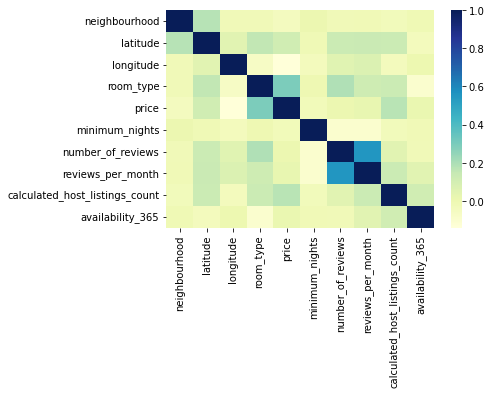

In [165]:
#I will check again for some correlations with the processed dataframe

corr = proc_df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [166]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head(10)

,feature_1,feature_2,correlation
67,number_of_reviews,reviews_per_month,0.552470
76,reviews_per_month,number_of_reviews,0.552470
43,price,room_type,0.293621
34,room_type,price,0.293621
63,number_of_reviews,room_type,0.188948
36,room_type,number_of_reviews,0.188948
10,latitude,neighbourhood,0.175541
1,neighbourhood,latitude,0.175541
84,calculated_host_listings_count,price,0.170651
48,price,calculated_host_listings_count,0.170651


We can observe more clearly now that all variables are poorly correlated.
This is good in order to avoid data leakage, but a correlation so weak might result in a poor prediction. It will be corroborated in the model result.

# Modelling

Here i will declare the X and y values in order to make some prediction models on price

## X and y definition

In [175]:
y = proc_df['price']

X = proc_df.filter(items=['room_type','latitude','longitude', 'number_of_reviews','reviews_per_month','availability_365','neighbourhood','calculated_host_listings_count'])

In [176]:
# train test splitting

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [239]:
lin_model = LinearRegression()
las_model = Lasso()
r_model = Ridge(alpha=0.5)
en_model = ElasticNet()
svr_model = SVR(kernel='poly')
kn_model= KNeighborsRegressor(n_neighbors=25)
dt_model = DecisionTreeRegressor()

cv_results = cross_validate(kn_model, X_train, y_train, cv=10, scoring=['r2'])

cv_results['test_r2'].mean()

0.22345237301455775

In [193]:
kn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [194]:
y_pred = kn_model.predict(X_test)

In [196]:
kn_model.fit(X_train, y_train)
y_pred = kn_model.predict(X_test)


#print(kn_model.coef_)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.6998160189320416
0.2430436411766872


**FIRST CONCLUSIONS**
* Even if in this document it only appears to be one round of modeling, in reality several combinations have been done. So far, all regression models failed to achieve a good enough performance, with the KN regressor being the least bad model with an r2 score of 0.24
* I will perform a gridsearch or randomsearch in order to find the best combination of hyperparameters and see if i can achieve a significantly better result

## Making the preprocessing pipelines

In order to perform the grid search, it is necessary to have automatized the preprocessing with a pipeline, which i will do next.

In [212]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('std_scaler', StandardScaler())
])

In [258]:
from sklearn.compose import ColumnTransformer

num_trans = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_trans = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num_trans', num_trans, ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']),
    ('cat_trans', cat_trans, ['neighbourhood', 'room_type'])
])

In [259]:

list_df.head(1) # just remembering the columns

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4123,1,0,2021-12-19,1.45399,1,363,0


In [260]:
from sklearn import set_config; set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('num_trans',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['latitude', 'longitude', 'minimum_nights',
                                  'number_of_reviews', 'reviews_per_month',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('cat_trans',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['neighbourhood', 'room_type'])])

In [261]:
new_X = list_df.filter(items=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood', 'room_type'])
new_y = list_df['price']

In [262]:
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(new_X, new_y, test_size=0.30, random_state=1)

In [263]:
X_train_t = preprocessor.fit_transform(n_X_train)

display(pd.DataFrame(X_train_t).head()) #looking at the transformed data

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.279073,0.308552,-0.380461,-0.155912,0.049190,7.416744,0.322458,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.834948,0.268071,0.003205,-0.194692,-0.628589,0.159294,0.919247,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.876725,0.457167,-0.380461,-0.136521,1.388350,-0.234521,-0.516273,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.196495,-0.180548,-0.380461,-0.427376,1.180643,-0.347039,0.693435,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.830835,-0.559573,-0.188628,1.278971,1.350088,-0.290780,0.967635,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [264]:
from sklearn.pipeline import make_pipeline

pipe_m = make_pipeline(preprocessor, kn_model)
pipe_m

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['neighbourhood',
                                                   'room_type'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=25))])

In [265]:
#testing the pipeline with the kn_model previously declared

pipe_m.fit(n_X_train, n_y_train)

pipe_m.score(n_X_test, n_y_test)

0.22444322072567535

In [241]:
cross_val_score(pipe_m, n_X_train, n_y_train, cv=10, scoring='r2').mean()

0.21341178046547138

We see simillar results since the process is the same, it's just automatized into a pipeline, next i will do the search for the best model and hyperparameters

### Performing randomized search

Using TPOT automatic search, i use the preprocessor pipeline built previously in order to find the best model with the best parameters, so the best score is achieved.

In [246]:
#pipe_m.get_params() #exploring the parameters of the pipeline

In [247]:
import os
from tpot import TPOTRegressor

X_train_pre = preprocessor.fit_transform(n_X_train)
X_test_pre = preprocessor.fit_transform(n_X_test)

/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [248]:
tpot = TPOTRegressor(generations=4, population_size=20, verbosity=2, scoring='r2', n_jobs=-1, cv=2)

tpot.fit(X_train_pre, n_y_train)

print(tpot.score(X_test_pre, n_y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.267854566908986

Generation 2 - Current best internal CV score: 0.2703065749661537

Generation 3 - Current best internal CV score: 0.2703065749661537

Generation 4 - Current best internal CV score: 0.2703065749661537

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=1.0, min_samples_leaf=4, min_samples_split=18, n_estimators=100)
0.3246672675369535


/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/pyth

# FINAL CONCLUSIONS
* ## Under manual modelling, the best model was found to be KN regressor with 25 neighboirs, having a final r2 score of 0.24
* ## Automatic search for best model and best parameters showed that the best model for these data was RandomForest regressor with a final r2 score of 0.32
* ## Neither of those results are enough to predict the price per night of an airbnb room in Mexico City
* ## The downloaded data wasn't enogh to perform regression models as suggested by the lack of correlation among the variables

* ## Classification models could still be an option to explore